<h1> <font color = 'blue'><center> CVEN-5370: GIS Application in Civil Engineering </center></font></h1>

<h3> <font color = 'teal'><center>Md Washemuzzaman Lajuk (L20606192) </center></font></h3>

<hr>

In [71]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from shapely.geometry import Point, LineString, Polygon

In [72]:
path = '/Users/washemuzzamanlajuk/Desktop/Fall 2025/GIS/Assignment-2/Data'
os.chdir(path)

<h3> Read Data And Reproject to Same CRS EPSG3083

In [73]:
ftexas = 'County_Boundaries.shp'
fwells = 'TWDB_Groundwater.shp'
froads = 'tl_2019_48_prisecroads.shp'
texas= gpd.read_file(ftexas)
wells= gpd.read_file(fwells)
roads= gpd.read_file(froads)

In [74]:
crsp = 'epsg:3083'
texasp = texas.to_crs(crsp)
wellsp = wells.to_crs(crsp)
roadsp = roads.to_crs(crsp)

Text(0.5, 1.0, 'Major Roads and Wells in Texas')

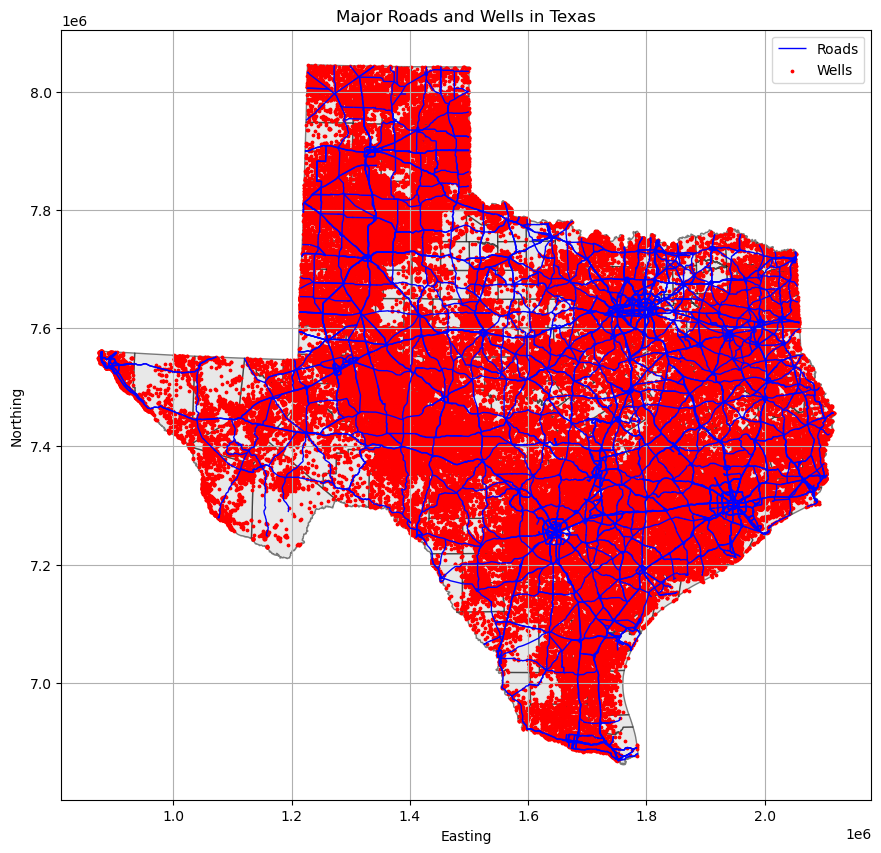

In [75]:
fig,ax = plt.subplots(figsize=(12,10))
roadsp.plot(ax=ax,color ='blue', linewidth =1,label = 'Roads')
texasp.plot(ax=ax,color ='lightgrey', edgecolor = 'black', alpha =0.5)
wellsp.plot(ax=ax,color ='red', markersize=3,label = 'Wells')
plt.grid()
plt.xlabel ('Easting')
plt.ylabel ('Northing')
plt.legend()
plt.title("Major Roads and Wells in Texas")


In [76]:
texasp.head()

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((1548581.291 7218735.879, 1548468.505..."
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((1802991.419 7283200.383, 1803004.233..."
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((1955932.657 7285025.893, 1955942.414..."
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((1869676.725 7285704.18, 1869702.421 ..."
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((1557004.141 7228370.693, 1557000.037..."


In [77]:
texasp['AreaSQMI'] = texasp.area*(0.0006213712**2)

In [78]:
texasp.head()

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry,AreaSQMI
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((1548581.291 7218735.879, 1548468.505...",1564.694617
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((1802991.419 7283200.383, 1803004.233...",971.077415
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((1955932.657 7285025.893, 1955942.414...",1486.250629
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((1869676.725 7285704.18, 1869702.421 ...",1094.349277
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((1557004.141 7228370.693, 1557000.037...",1339.620004


In [79]:
area = np.sum(texasp.AreaSQMI)
print(area)

267232.50656678923


<h3> Dissolve the Counties in Texas

In [80]:
texasd = texasp.dissolve() #Require() as it is a method

<function matplotlib.pyplot.show(close=None, block=None)>

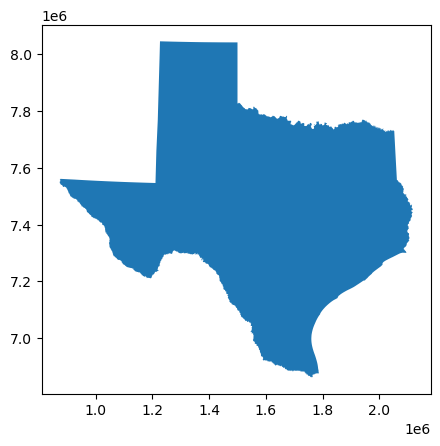

In [81]:
texasd.plot()
plt.show

In [82]:
texasd.head()

,geometry,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,AreaSQMI
0,"POLYGON ((1276002.91 7307500.853, 1276009.411 ...",232,232,48463,232,15,Uvalde,232,15,35,1564.694617


In [83]:
texasd.columns

Index(['geometry', 'CMPTRL_CNT', 'DPS_CNTY_N', 'FIPS_ST_CN', 'TXDOT_CNTY',
       'TXDOT_DIST', 'CNTY_NM', 'CNTY_NBR', 'DIST_NBR', 'GID', 'AreaSQMI'],
      dtype='object')

In [84]:
texasd = texasd.drop(columns=['AreaSQMI'])

In [85]:
texasd.head()

,geometry,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID
0,"POLYGON ((1276002.91 7307500.853, 1276009.411 ...",232,232,48463,232,15,Uvalde,232,15,35


In [86]:
texasd['AreaSQMI'] = texasd.area*(.000621371**2)

In [87]:
texasd.head()

,geometry,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,AreaSQMI
0,"POLYGON ((1276002.91 7307500.853, 1276009.411 ...",232,232,48463,232,15,Uvalde,232,15,35,267232.334434


<h3> Road area Calculation

In [104]:
roadsb['AreaSQMI'] = roadsb.area*np.power(0.0006213712,2)
roadsb.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry,length_m,length_miles,AreaSQMI
0,1102671600066,S Walton Walker Rmp,M,S1200,"POLYGON ((1791124.277 7623026.222, 1791122.834...",354.088872,0.220021,0.011053
1,1102671599582,S Walton Walker Rmp,M,S1200,"POLYGON ((1791074.521 7623041.707, 1791072.581...",356.496657,0.221517,0.011118
2,110449721117,West S Lp,M,S1200,"POLYGON ((1668850.606 7566623.114, 1668850.806...",1004.673251,0.624277,0.028637
3,110449719101,W S Lp,M,S1200,"POLYGON ((1668442.481 7566371.953, 1668588.38 ...",558.912815,0.347293,0.016589
4,1106039033336,E S Lp,M,S1200,"POLYGON ((1669761.635 7567180.233, 1669762.734...",2235.308450,1.388960,0.061897


In [105]:
sum(roadsb.AreaSQMI)


2764.9544684026887

<h3> Find the length per County (Spatial Join)

In [139]:
roadscty = gpd.overlay(roadsp,texasp,how ='intersection')

In [140]:
roadscty.columns

Index(['LINEARID', 'FULLNAME', 'RTTYP', 'MTFCC', 'length_m', 'length_miles',
       'CMPTRL_CNT', 'DPS_CNTY_N', 'FIPS_ST_CN', 'TXDOT_CNTY', 'TXDOT_DIST',
       'CNTY_NM', 'CNTY_NBR', 'DIST_NBR', 'GID', 'AreaSQMI', 'geometry'],
      dtype='object')

In [141]:
roadscty.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,length_m,length_miles,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,AreaSQMI,geometry
0,1102671600066,S Walton Walker Rmp,M,S1200,354.088872,0.220021,57,57,48113,57,18,Dallas,57,18,177,908.412683,"LINESTRING (1791293.798 7623070.326, 1791122.4..."
1,1102671599582,S Walton Walker Rmp,M,S1200,356.496657,0.221517,57,57,48113,57,18,Dallas,57,18,177,908.412683,"LINESTRING (1791294.231 7623081.564, 1791073.7..."
2,110449721117,West S Lp,M,S1200,1004.673251,0.624277,72,72,48143,73,2,Erath,73,2,149,1087.398518,"LINESTRING (1668852.254 7566582.529, 1668869.5..."
3,110449719101,W S Lp,M,S1200,558.912815,0.347293,72,72,48143,73,2,Erath,73,2,149,1087.398518,"LINESTRING (1668373.606 7566294.178, 1668459.8..."
4,1106039033336,E S Lp,M,S1200,2235.308450,1.388960,72,72,48143,73,2,Erath,73,2,149,1087.398518,"LINESTRING (1669708.783 7567107.535, 1669779.6..."


In [142]:
roadscty = roadscty.rename(columns={'length_miles': 'LengthMI'})

In [143]:
roadscty.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,length_m,LengthMI,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,AreaSQMI,geometry
0,1102671600066,S Walton Walker Rmp,M,S1200,354.088872,0.220021,57,57,48113,57,18,Dallas,57,18,177,908.412683,"LINESTRING (1791293.798 7623070.326, 1791122.4..."
1,1102671599582,S Walton Walker Rmp,M,S1200,356.496657,0.221517,57,57,48113,57,18,Dallas,57,18,177,908.412683,"LINESTRING (1791294.231 7623081.564, 1791073.7..."
2,110449721117,West S Lp,M,S1200,1004.673251,0.624277,72,72,48143,73,2,Erath,73,2,149,1087.398518,"LINESTRING (1668852.254 7566582.529, 1668869.5..."
3,110449719101,W S Lp,M,S1200,558.912815,0.347293,72,72,48143,73,2,Erath,73,2,149,1087.398518,"LINESTRING (1668373.606 7566294.178, 1668459.8..."
4,1106039033336,E S Lp,M,S1200,2235.308450,1.388960,72,72,48143,73,2,Erath,73,2,149,1087.398518,"LINESTRING (1669708.783 7567107.535, 1669779.6..."


In [144]:
roadsctyg = roadscty.groupby('CNTY_NM')['LengthMI'].sum().reset_index()

In [145]:
roadsctyg.head()

,CNTY_NM,LengthMI
0,Anderson,332.252502
1,Andrews,565.223176
2,Angelina,366.664069
3,Aransas,100.591504
4,Archer,322.383693


In [146]:
roadsctyg.sort_values(by='LengthMI',ascending=False)

,CNTY_NM,LengthMI
100,Harris,2861.077799
56,Dallas,2023.649951
219,Tarrant,1775.090326
14,Bexar,1530.845860
69,El Paso,938.480326
...,...,...
31,Camp,55.585111
196,Roberts,53.965543
212,Somervell,53.033072
16,Borden,48.887401


In [147]:
roadsctyg.loc[(roadsctyg)['CNTY_NM']=='Jefferson']

,CNTY_NM,LengthMI
122,Jefferson,718.498646


<hr>

<hr style="height:5px; background-color:black; border:none;">


<h1> <center> <font color = 'green'> Random Practice with Differenet Codes

In [149]:
# Keep only geometry and AreaSQMI from texasd
texasd = texasd[["geometry", "AreaSQMI"]]
texasd

,geometry,AreaSQMI
0,"POLYGON ((1276002.91 7307500.853, 1276009.411 ...",1564.694617


In [150]:
texasd['AreaSQMI'] = texasp.area*(0.0006213712**2)
texasd.head()

,geometry,AreaSQMI
0,"POLYGON ((1276002.91 7307500.853, 1276009.411 ...",1564.694617


In [151]:
# Length in meters
roadsp["length_m"] = roadsp.geometry.length

# Convert to miles
roadsp["length_miles"] = roadsp["length_m"] / 1609.34

# Total length
total_length_miles = roadsp["length_miles"].sum()
print(f"Total road length in Texas = {total_length_miles:,.2f} miles")


Total road length in Texas = 63,284.54 miles


<h3> Road area Calculation

In [152]:
#This is not from Class
import geopandas as gpd
import numpy as np

# 1) Reproject to meters (Texas-centric)
texasp_3083 = texasp.to_crs(epsg=3083)      # Texas boundary (polygon)
roadsp_3083 = roadsp.to_crs(epsg=3083)      # Roads (LineString/MultiLineString)

# 2) Pick a width strategy
# Option A: If you have 'lanes' per road, estimate paved width:
#   width = lanes * 3.6 m per lane + 2 * 1.5 m shoulders  (adjust as needed)
if 'lanes' in roadsp_3083.columns:
    roadsp_3083['lanes'] = pd.to_numeric(roadsp_3083['lanes'], errors='coerce')
    roadsp_3083['width_m'] = (roadsp_3083['lanes'].fillna(2) * 3.6) + 3.0
else:
    # Option B: If no lanes, map by class/type (customize to your schema)
    # Replace 'road_type' with your column (e.g., 'FUNC_CLASS', 'TYPE', 'MTFCC', etc.)
    width_defaults = {
        'Interstate': 30.0,  # ~ 8 lanes incl. shoulders (rough default)
        'Highway':    24.0,  # ~ 4–6 lanes
        'Primary':    18.0,
        'Secondary':  12.0,
        'Local':       8.0
    }
    default_width = 10.0
    col = 'road_type' if 'road_type' in roadsp_3083.columns else None
    if col:
        roadsp_3083['width_m'] = roadsp_3083[col].map(width_defaults).fillna(default_width)
    else:
        roadsp_3083['width_m'] = default_width  # fallback if no classification

# 3) Buffer lines to polygons (half-width)
# cap_style=2 for flat ends; adjust if you prefer rounded (cap_style=1)
road_buffers = roadsp_3083.buffer(roadsp_3083['width_m'] / 2.0, cap_style=2)

# Build a GeoDataFrame for buffers
roads_poly = gpd.GeoDataFrame(roadsp_3083.drop(columns='geometry'), geometry=road_buffers, crs=roadsp_3083.crs)

# 4) Clip to Texas boundary so buffers don’t extend past state
roads_poly_clip = gpd.overlay(roads_poly, texasp_3083[['geometry']], how='intersection')

# 5) Dissolve all buffers to avoid overlaps (no double-counting)
roads_poly_clip['__all__'] = 1
roads_paved_area = roads_poly_clip.dissolve(by='__all__')

# 6) Compute area
area_m2 = float(roads_paved_area.geometry.area.iloc[0])
area_sqmi = area_m2 / (1609.34**2)

print(f"Estimated paved road area in Texas: {area_m2:,.0f} m²  (~{area_sqmi:,.2f} sq mi)")


Estimated paved road area in Texas: 676,347,215 m²  (~261.14 sq mi)


In [153]:
width = 35 #road occupies 70m total
roadsb=roadsp.copy()
roadsb['geometry'] = roadsb.geometry.buffer(width)
roadsb.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry,length_m,length_miles
0,1102671600066,S Walton Walker Rmp,M,S1200,"POLYGON ((1791124.277 7623026.222, 1791122.834...",354.088872,0.220021
1,1102671599582,S Walton Walker Rmp,M,S1200,"POLYGON ((1791074.521 7623041.707, 1791072.581...",356.496657,0.221517
2,110449721117,West S Lp,M,S1200,"POLYGON ((1668850.606 7566623.114, 1668850.806...",1004.673251,0.624277
3,110449719101,W S Lp,M,S1200,"POLYGON ((1668442.481 7566371.953, 1668588.38 ...",558.912815,0.347293
4,1106039033336,E S Lp,M,S1200,"POLYGON ((1669761.635 7567180.233, 1669762.734...",2235.308450,1.388960


In [154]:
roadsb["AreaSQMI"] = roadsb.geometry.area / (1609.34**2)

In [155]:
roadsb.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry,length_m,length_miles,AreaSQMI
0,1102671600066,S Walton Walker Rmp,M,S1200,"POLYGON ((1791124.277 7623026.222, 1791122.834...",354.088872,0.220021,0.011053
1,1102671599582,S Walton Walker Rmp,M,S1200,"POLYGON ((1791074.521 7623041.707, 1791072.581...",356.496657,0.221517,0.011118
2,110449721117,West S Lp,M,S1200,"POLYGON ((1668850.606 7566623.114, 1668850.806...",1004.673251,0.624277,0.028637
3,110449719101,W S Lp,M,S1200,"POLYGON ((1668442.481 7566371.953, 1668588.38 ...",558.912815,0.347293,0.016589
4,1106039033336,E S Lp,M,S1200,"POLYGON ((1669761.635 7567180.233, 1669762.734...",2235.308450,1.388960,0.061897


In [156]:
# Using pandas sum method
total_area_sqmi = roadsb.AreaSQMI.sum()

print(f"Total road-covered area in Texas = {total_area_sqmi:,.2f} sq mi")

Total road-covered area in Texas = 2,764.97 sq mi


<h3> Find the Lengths Per County (Spatial Join)

In [157]:
#Spatial overlay (roads ∩ counties)
roadscty = gpd.overlay(roadsb, texasp, how="intersection")

In [97]:
roadscty.columns

Index(['LINEARID', 'FULLNAME', 'RTTYP', 'MTFCC', 'length_m', 'length_miles',
       'AreaSQMI_1', 'CMPTRL_CNT', 'DPS_CNTY_N', 'FIPS_ST_CN', 'TXDOT_CNTY',
       'TXDOT_DIST', 'CNTY_NM', 'CNTY_NBR', 'DIST_NBR', 'GID', 'AreaSQMI_2',
       'geometry'],
      dtype='object')

In [98]:
# 4. Calculate area in sq miles for each piece
roadscty["AreaSQMI"] = roadscty.geometry.area / (1609.34**2)

# 5. Dissolve/group by county (use county name column)
county_roads = roadscty.dissolve(by="CNTY_NM", aggfunc="sum")[["AreaSQMI"]]

print(county_roads.head())

           AreaSQMI
CNTY_NM            
Anderson  12.070301
Andrews   19.870791
Angelina  14.280754
Aransas    3.802213
Archer     7.948996


In [99]:
roadsctyg = roadscty.groupby('CNTY_NM')['length_miles'].sum().reset_index()

In [100]:
roadsctyg.head()

,CNTY_NM,length_miles
0,Anderson,375.914697
1,Andrews,618.206874
2,Angelina,482.788418
3,Aransas,141.903879
4,Archer,422.955047


In [101]:
roadsctyg.sort_values(by='length_miles', ascending=False)

,CNTY_NM,length_miles
100,Harris,3048.225946
56,Dallas,2503.714117
219,Tarrant,1914.112010
14,Bexar,1779.328429
69,El Paso,1102.348515
...,...,...
31,Camp,85.672208
196,Roberts,79.681572
212,Somervell,74.965642
16,Borden,66.329933


In [102]:
# Filter for Jefferson County only
jefferson_roads = roadsctyg[roadsctyg["CNTY_NM"] == "Jefferson"]

print(jefferson_roads)

       CNTY_NM  length_miles
122  Jefferson    814.861664


In [103]:
roadsctyg.loc[roadsctyg["CNTY_NM"] == "Jefferson"]

,CNTY_NM,length_miles
122,Jefferson,814.861664
